# Drilling Activity Prediction: Exploratory Data Analysis

- Data Overview
- Reindex dataframe
- Oil Variables Feature Engineering
- Gas Variables Feature Engineering
- Select Features for VAR model
- Final Pre-processing Activities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Oil&Gas.csv',index_col=0,parse_dates=True)

#### Data Overview

In [3]:
df.head(5)

,oil_price,gas_price,oilrig_count,gasrig_count,totalrig_count,onshore_count,offshore_count,totalwell_count,oilwell_count,gaswell_count,...,oilstorage_amount_y,oilstoragechange_amount,oildaysofsupply,gasimports_amount,gasexports_amount,gasproduction_amount,gasconsumption_amount,gasstorage_amount,uspopulation,usemissions
date,,,,,,,,,,,,,,,,,,,,,
2021-10-25,84.64,5.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,84.53,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1044998.0,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,82.64,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-20,84.40,4.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-19,83.19,4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().transpose()[['count','mean','min','max','std']].round(2)

,count,mean,min,max,std
oil_price,9038.0,44.52,-36.98,145.31,28.73
gas_price,6222.0,4.15,0.00,23.86,2.18
oilrig_count,410.0,497.42,108.00,1596.00,361.41
gasrig_count,410.0,584.97,70.00,1585.00,388.99
totalrig_count,585.0,1389.25,250.00,4521.00,746.52
onshore_count,585.0,1285.06,237.00,4238.00,705.22
offshore_count,585.0,104.22,6.00,283.00,63.63
totalwell_count,456.0,3482.35,1268.00,8556.00,1654.50
oilwell_count,456.0,1363.82,291.00,3945.00,898.65
gaswell_count,456.0,1259.94,454.00,3200.00,626.67


#### Reindex dataframe
- Make sure index is in datetime format after importing csv file
- Make sure dates are day by day all the way

In [5]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
print(f"""Date Range:
Minimum: {df.index.min()}
Maximum: {df.index.max()}""")

Date Range:
Minimum: 1960-01-01 00:00:00
Maximum: 2021-10-25 00:00:00


In [7]:
idx = pd.date_range(start='1960-01-01 00:00:00',end='2021-10-25 00:00:00',freq='d')

In [8]:
df = df.reindex(idx, fill_value=np.nan)

In [9]:
df.tail().sort_index(ascending=False)

,oil_price,gas_price,oilrig_count,gasrig_count,totalrig_count,onshore_count,offshore_count,totalwell_count,oilwell_count,gaswell_count,...,oilstorage_amount_y,oilstoragechange_amount,oildaysofsupply,gasimports_amount,gasexports_amount,gasproduction_amount,gasconsumption_amount,gasstorage_amount,uspopulation,usemissions
2021-10-25,84.64,5.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,84.53,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1044998.0,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,82.64,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(22579, 29)

#### Oil Variables Feature Engineering
- Get count of remedial rigs aka rigs that are not for oil or gas.
- Merge monthly data columns with weekly data columns to increase data density
- Re-scale Oil Storage, merge data from Oil Storage Features.

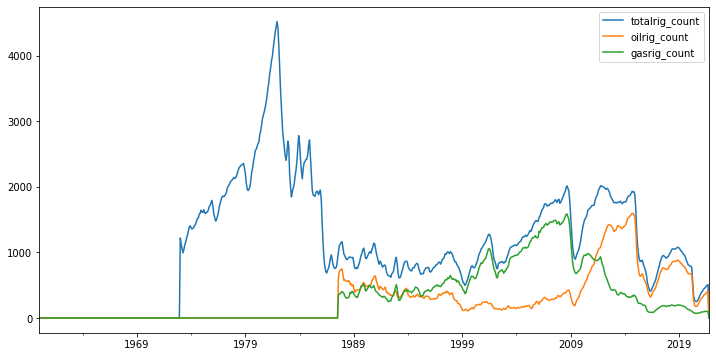

In [11]:
df[['totalrig_count','oilrig_count','gasrig_count']].resample(rule='M').mean().fillna(0).plot.line(figsize=(12,6));

In [12]:
df['remrig_count'] = df['totalrig_count'] - df['oilrig_count'] - df['gasrig_count']

In [13]:
df[['totalrig_count','oilrig_count','gasrig_count','remrig_count']].dropna()

,totalrig_count,oilrig_count,gasrig_count,remrig_count
1987-08-01,1003.0,626.0,352.0,25.0
1987-09-01,1101.0,713.0,364.0,24.0
1987-10-01,1124.0,727.0,377.0,20.0
1987-11-01,1152.0,746.0,386.0,20.0
1987-12-01,1162.0,746.0,403.0,13.0
...,...,...,...,...
2021-05-01,453.0,353.0,100.0,0.0
2021-06-01,464.0,367.0,97.0,0.0
2021-07-01,483.0,381.0,102.0,0.0
2021-08-01,501.0,400.0,100.0,1.0


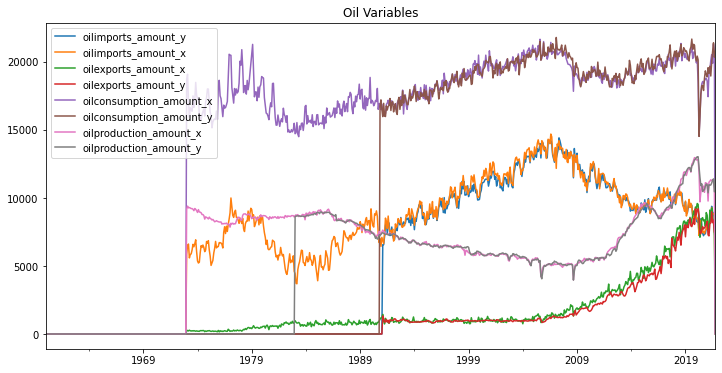

In [14]:
plot_list = ['oilimports_amount_y','oilimports_amount_x',
             'oilexports_amount_x','oilexports_amount_y',
             'oilconsumption_amount_x','oilconsumption_amount_y',
            'oilproduction_amount_x','oilproduction_amount_y']

df[plot_list].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Oil Variables');

In [15]:
"""
Function will append two columns that contain same data at different times. 
Also, it will include data that is not in one feature but it is available in the other one.
"""
def mergecolumns(column1,column2,newcolumn='newcolumn'):
    date1 = df[column2].dropna().index.min() - pd.to_timedelta('1 day')
    date2 = df[column2].dropna().index.min()
    df[newcolumn] = df[column1][:date1].append(df[column2][date2:])
    filtered_data = df[[newcolumn,column1]].loc[(-df[column1].isna()) & (df[newcolumn].isna()),column1]
    df[newcolumn].loc[filtered_data.index,] = filtered_data.values

In [16]:
mergecolumns('oilimports_amount_x','oilimports_amount_y','oilimports')
mergecolumns('oilexports_amount_x','oilexports_amount_y','oilexports')
mergecolumns('oilconsumption_amount_x','oilconsumption_amount_y','oilconsumption')
mergecolumns('oilproduction_amount_x','oilproduction_amount_y','oilproduction')

In [17]:
df[['oilimports','oilimports_amount_x','oilimports_amount_y']].describe()

,oilimports,oilimports_amount_x,oilimports_amount_y
count,2136.000000,585.000000,1603.000000
mean,10071.030379,9149.604550,10420.676232
std,2120.527310,2476.540502,1854.460564
min,3689.513000,3689.513000,5775.000000
25%,8651.250000,7296.887000,9112.500000
50%,10011.500000,9092.258000,10227.000000
75%,11555.250000,11002.517000,11717.000000
max,15217.000000,14696.613000,15217.000000


<AxesSubplot:title={'center':'Compare Imports curves with Merged curve'}>

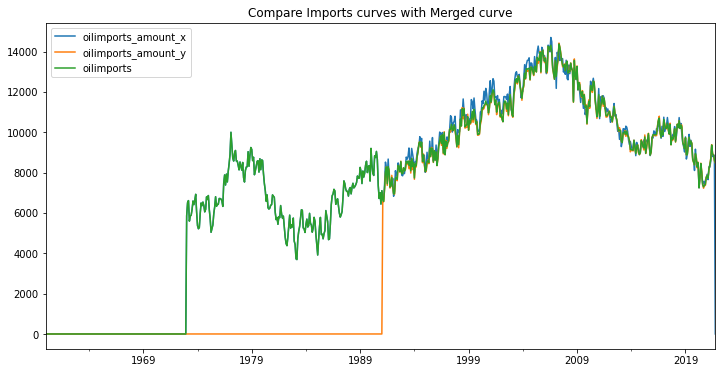

In [18]:
df[['oilimports_amount_x','oilimports_amount_y','oilimports']].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Compare Imports curves with Merged curve')

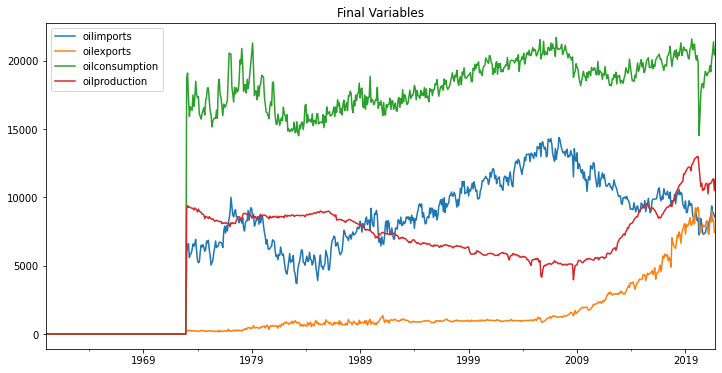

In [19]:
plot_list = ['oilimports','oilexports','oilconsumption','oilproduction']
df[plot_list].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Final Variables');

<AxesSubplot:title={'center':'Oil Storage'}>

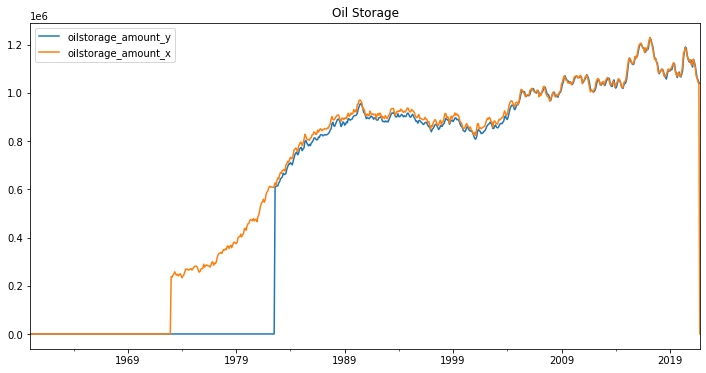

In [20]:
"""
Oil Storage Y is in Thousand Barrels
Oil Storage X is in Million Barrels

We will convert Oil Storage X in Thousand Barrels
"""

df['oilstorage_amount_y'].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Oil',legend=True)
(df['oilstorage_amount_x'].apply(lambda x: x*1000)).resample('M').mean().fillna(0).plot(figsize=(12,6),title='Oil Storage',legend=True)

In [21]:
df['oilstorage_amount_x'] = df['oilstorage_amount_x'].apply(lambda x: x*1000)
mergecolumns('oilstorage_amount_x','oilstorage_amount_y','oilstorage')

#### Gas Variables Feature Engineering
- XXX
- XXX
- XXX

#### Select Features for VAR model
- Correlation Plot
- Granger Causality Test

#### Final Pre-processing Activities
- Stationarity Test
- Normalize data